<a href="https://colab.research.google.com/github/manojjha/BITS_Assignments/blob/main/IMDB_review_NLP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- <a href='#1'>1. Load libraries and read the data</a>  
    - <a href='#1.1'>1.1. Load libraries</a>
    - <a href='#1.2'>1.2. Download the dataset and create dataframe as IMDB</a>
    - <a href='#1.3'>1.3. Check Info</a>
    - <a href='#1.4'>1.4. Check describe</a>

- <a href='#2'>2. Preprocessing steps</a>
    - <a href='#2.1'>2.1. Removing punctuation, number and special characters</a>
    - <a href='#2.2'>2.2. Remove stop words in dataset</a>

- <a href='#3'>3. Normalize review</a>
    - <a href='#3.1'>3.1. Using Stemming on Review dataset</a>
   
- <a href='#4'>4. Preprocessed review</a>
    - <a href='#4.1'>4.1. Included in the IMDB_df as Cleaned_review and create Wordcloud</a>

- <a href='#5'>5. Perform N-gram Analysis on cleaned_ review</a>
    - <a href='#5.1'>5.1.  20 - most frequently occurring Bigrams</a>   
    - <a href='#5.2'>5.2.  20 - most frequently occurring Trigrams</a>

- <a href='#6'>6. Create train and test set</a>
    - <a href='#6.1'>6.1.  Perform label encoding technique</a>   
    - <a href='#6.2'>6.2.  Create TFIDF object and split the data</a>
      - <a href='#6.2.1'>6.2.1.  Train Support Vector machine model</a>
      - <a href='#6.2.2'>6.2.2.  Display the confusion matrix</a>
    - <a href='#6.3'>6.3.  Create BoW object and split the data</a>
      - <a href='#6.3.1'>6.3.1.  Train Support Vector machine model</a>
      - <a href='#6.3.2'>6.3.2.  Display the confusion matrix</a>
    - <a href='#6.2'>6.2.  Compare TFIDF and BoW Model</a>

## <a id='1.1'>1.1. Load libraries</a>

In [2]:
#import all the packages for IMDB review sentiment analysis

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


## <a id='1.2'>1.2. Download the dataset and create dataframe as IMDB</a>


#### 1. Download the dataset and create a dataframe named as IMDB then check the head, info, and
describe methods on created dataframe

In [3]:
# Download the dataset and create a dataframe named as IMDB then check the head, info, and describe methods on created dataframe IMDB.

IMDB_df = pd.read_csv('https://raw.githubusercontent.com/manojjha/BITS_Assignments/main/NLP/IMDB%20Dataset.csv?token=GHSAT0AAAAAACJXQMXDNSKYL6LUDAUK5SISZMICSXQ')
IMDB_df.head()



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## <a id='1.3'>1.3. Check Info</a>

In [4]:
IMDB_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## <a id='1.4'>1.4. Check describe</a>



In [5]:
IMDB_df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
IMDB_df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

## <a id='2'>2. Preprocessing steps</a>


In [7]:
import nltk
nltk.download('stopwords')
tokenizer = ToktokTokenizer()

stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <a id='2.1'>2.1. Removing punctuation, number and special characters</a>


In [8]:
#Removing noise text

def strip_html(text):
  soup = BeautifulSoup(text, 'html.parser')
  return soup.get_text()

def remove_between_square_brackets(text):
  return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
  text = strip_html(text)
  text = remove_between_square_brackets(text)
  return text

IMDB_df['review'] = IMDB_df['review'].apply(denoise_text)

<ipython-input-8-45a07ec378be>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [9]:
#remove special characters

def remove_special_characters(text, remove_digits=True):
  pattern = r'[^a-zA-Z0-9\s]'
  text = re.sub(pattern,'', text)
  return text

IMDB_df['review'] = IMDB_df['review'].apply(remove_special_characters)

In [10]:
IMDB_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


## <a id='2.2'>2.2. Remove stop words in dataset</a>


In [11]:
# Removing stopwords

stop = set(stopwords.words('english'))
print(stop)

{'because', "needn't", 'and', 'any', 'few', 'down', 'into', "you'd", 'for', 'themselves', 'each', 'me', "aren't", 'or', 't', 'needn', 'whom', 'ourselves', 'between', 'y', 'through', 'wouldn', 'this', 'when', 'were', 'over', 'hasn', 'been', 'them', 'himself', 'has', 'against', 'after', 'its', 'but', 'ma', 'ours', 'under', 'shan', "shan't", "hasn't", 'out', 'on', 'then', "mustn't", 'is', 'isn', 'being', 'before', 'too', 'how', 've', 'again', 'an', "that'll", "weren't", 'other', 'was', 'as', "don't", 'a', 'what', 'nor', "wasn't", 'some', 'he', 'i', 'am', 'did', 's', 'where', 'of', 'your', 'very', "shouldn't", "haven't", 'o', 'aren', 'shouldn', 'no', 'while', 'both', 'myself', 'so', 'haven', 'she', 'm', 'ain', 'until', "should've", 'wasn', 'from', "you've", 'should', 'above', 'only', 'd', 'won', 'do', 'don', 're', 'my', 'weren', 'had', 'such', 'by', "you're", "mightn't", "hadn't", 'more', 'just', 'yourselves', 'you', "doesn't", 'itself', 'yourself', 'those', 'who', 'up', 'not', 'at', 'the'

In [12]:
def remove_stopwords(text, is_lower_case = False):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword_list ]

  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list ]

  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

IMDB_df['review'] = IMDB_df['review'].apply(remove_stopwords)

In [13]:
IMDB_df.head()

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically theres family little boy Jake thinks...,negative
4,Petter Matteis Love Time Money visually stunni...,positive


## <a id='3'>3. Normalize review</a>


## <a id='3.1'>3.1. Using Stemming on Review dataset</a>


In [14]:
# text stemming

def simple_stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = ' '.join([ps.stem(word) for word in text.split()])
  return text

IMDB_df['review'] = IMDB_df['review'].apply(simple_stemmer)

In [15]:
IMDB_df.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


## <a id='4'>4. Preprocessed review</a>
## <a id='4.1'>4.1. Included in the IMDB_df as Cleaned_review and create Wordcloud</a>



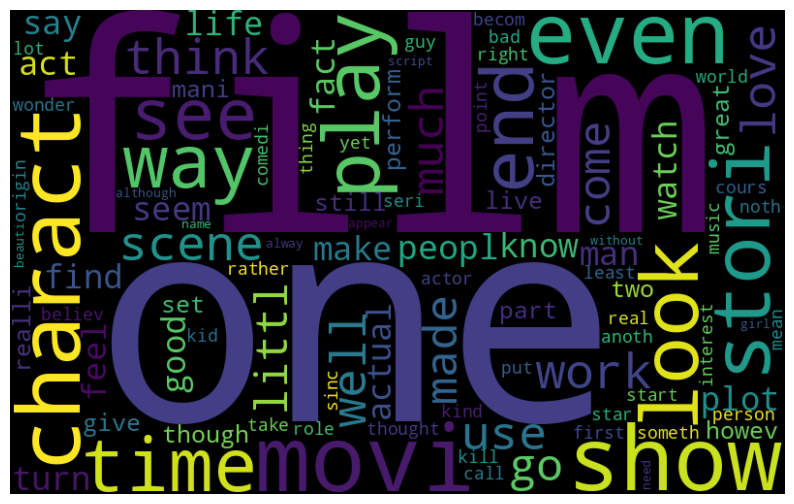

In [16]:
# prompt: Preprocessed text review should be included in the IMDB data frame as cleaned_review. Plot word cloud for the sentence

from wordcloud import WordCloud
import matplotlib.pyplot as plt
IMDB_df['cleaned_review'] = IMDB_df['review']
IMDB_df.head()


wc = WordCloud(width=800, height=500, random_state=21, max_words=100, min_font_size=10).generate(' '.join(IMDB_df['cleaned_review']))
plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


## <a id='5'>5. Perform N-gram Analysis on cleaned_ review</a>

## <a id='5.1'>5.1. 20 - most frequently occurring Bigrams</a>



In [17]:
from nltk.util import ngrams
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from collections import Counter

def generate_ngrams(text, n):
    n_grams = ngrams(text.split(), n)
    return [' '.join(grams) for grams in n_grams]

# Concatenate all cleaned reviews into a single text
cleaned_review = IMDB_df['review']
all_text = ' '.join(cleaned_review)

# Generate bigrams and trigrams
bigrams = generate_ngrams(all_text, 2)
trigrams = generate_ngrams(all_text, 3)

# Count the occurrences of each n-gram
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Get the 20 most common bigrams and trigrams
top_bigrams = bigram_counts.most_common(20)
top_trigrams = trigram_counts.most_common(20)

# Visualize the results
def plot_ngrams(top_ngrams, n):
    labels, values = zip(*top_ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.title(f'Top {n} {n}-grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-grams')
    plt.show()



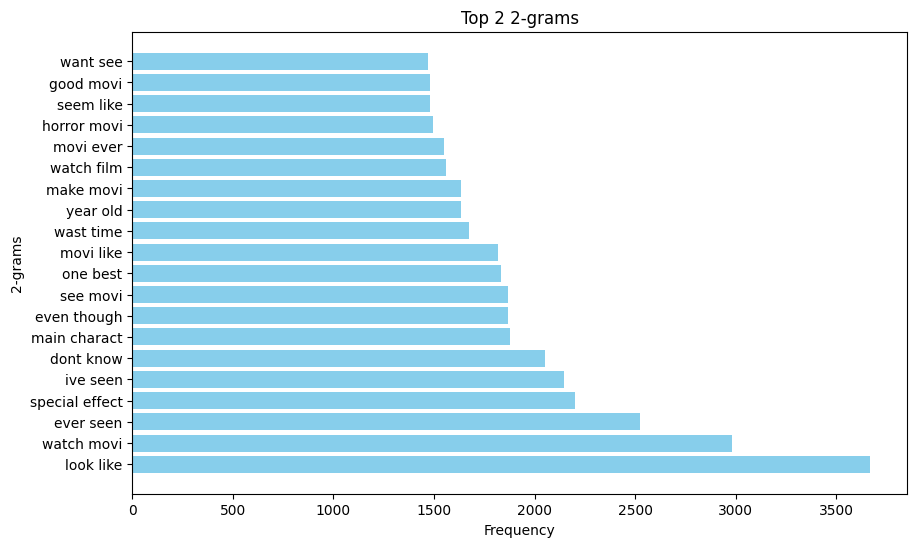

In [19]:
plot_ngrams(top_bigrams, 2)


## <a id='5.2'>5.2. 20 - most frequently occurring Trigrams</a>

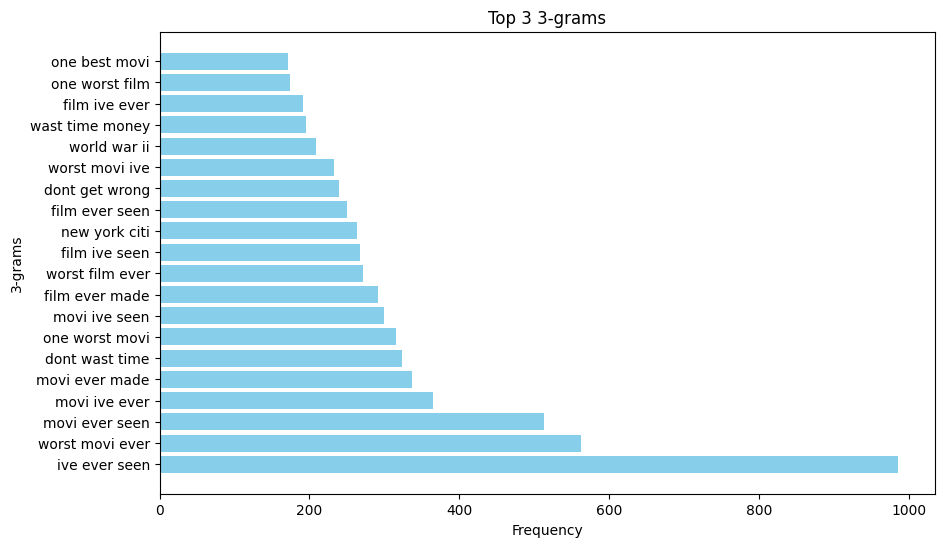

In [20]:
plot_ngrams(top_trigrams, 3)

In [21]:
IMDB_df.head()

,review,sentiment,cleaned_review
0,one review mention watch 1 oz episod youll hoo...,positive,one review mention watch 1 oz episod youll hoo...
1,wonder littl product film techniqu unassum old...,positive,wonder littl product film techniqu unassum old...
2,thought wonder way spend time hot summer weeke...,positive,thought wonder way spend time hot summer weeke...
3,basic there famili littl boy jake think there ...,negative,basic there famili littl boy jake think there ...
4,petter mattei love time money visual stun film...,positive,petter mattei love time money visual stun film...


In [ ]:
df.head()

,review,sentiment,cleaned_review
0,o n e r e v i e w e r ...,positive,o n e r e v i e w e r ...
1,w o n d e r f u l l i ...,positive,w o n d e r f u l l i ...
2,t h o u g h t w o n d ...,positive,t h o u g h t w o n d ...
3,b a s i c a l l y f a ...,negative,b a s i c a l l y f a ...
4,p e t t e r m a t t e ...,positive,p e t t e r m a t t e ...


6. Create two objects X and y. X will be the 'cleaned_ review' column of IMDB data frame
and y will be the 'Sentiment' column. ( 3 Marks)
- a. Perform label encoding technique for sentiment column
- b. Create a TFIDF object and split the data into training and testing sets. Train a Support
Vector machine model and Display the confusion Matrix.
- c. Create a BoW object and split the data into training and testing sets. Train a Support
Vector machine model and Display the confusion Matrix.
- d. Compare TFIDF and BoW.

## <a id='6'>6. Create train and test set</a>

## <a id='6.1'>6.1.  Perform label encoding technique</a>

## <a id='6.2'>6.2.  Create TFIDF object and split the data</a>

- <a href='#6'>6. Create train and test set</a>
    - <a href='#6.1'>6.1.  Perform label encoding technique</a>   
    - <a href='#6.2'>6.2.  Create TFIDF object and split the data</a>
      - <a href='#6.2.1'>6.2.1.  Train Support Vector machine model</a>
      - <a href='#6.2.2'>6.2.2.  Display the confusion matrix</a>
    - <a href='#6.3'>6.3.  Create BoW object and split the data</a>
      - <a href='#6.3.1'>6.3.1.  Train Support Vector machine model</a>
      - <a href='#6.3.2'>6.3.2.  Display the confusion matrix</a>
    - <a href='#6.2'>6.2.  Compare TFIDF and BoW Model</a>

In [22]:
# Step 1a: Create X and y objects
X = IMDB_df['cleaned_review']
y = IMDB_df['sentiment']

In [23]:
label_encoder = LabelEncoder()

# Step 2b: Fit and transform the 'Sentiment' column
y_encoded = label_encoder.fit_transform(y)

In [24]:
print(y_encoded)

[1 1 1 ... 0 0 0]


In [25]:
# Step 3a: Create a TFIDF object
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Step 3b: Fit and transform the data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 3c: Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

In [26]:
# Step 4a: Initialize and train the SVM model
svm_tfidf = SVC(kernel='linear', random_state=42)
svm_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Step 4b: Make predictions on the test set
y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)

# Step 4c: Display the confusion matrix
conf_matrix_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
print("Confusion Matrix (TFIDF):")
print(conf_matrix_tfidf)


Confusion Matrix (TFIDF):
[[4312  649]
 [ 509 4530]]


### Create Bag of Words (BoW) object and split the data

In [ ]:
# prompt: Create a BoW object and split the data into training and testing sets. Train a Support Vector machine model and Display the confusion Matrix

# Step 1a: Create a BoW object
bow_vectorizer = CountVectorizer(max_features=5000)

# Step 1b: Fit and transform the data
X_bow = bow_vectorizer.fit_transform(X)

# Step 1c: Split the data into training and testing sets
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_encoded, test_size=0.2, random_state=42)

# Step 2a: Initialize and train the SVM model
svm_bow = SVC(kernel='linear', random_state=42)
svm_bow.fit(X_train_bow, y_train_bow)

# Step 2b: Make predictions on the test set
y_pred_bow = svm_bow.predict(X_test_bow)

# Step 2c: Display the confusion matrix
conf_matrix_bow = confusion_matrix(y_test_bow, y_pred_bow)
print("Confusion Matrix (BoW):")
print(conf_matrix_bow)


In [28]:
# Step 5a: Create a Bag of Words (BoW) object
bow_vectorizer = CountVectorizer(max_features=5000)  # You can adjust max_features as needed

# Step 5b: Fit and transform the data
X_bow = bow_vectorizer.fit_transform(X)

# Step 5c: Split the data into training and testing sets
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Step 6a: Initialize and train the SVM model
svm_bow = SVC(kernel='linear', random_state=42)
svm_bow.fit(X_train_bow, y_train_bow)

# Step 6b: Make predictions on the test set
y_pred_bow = svm_bow.predict(X_test_bow)

# Step 6c: Display the confusion matrix
conf_matrix_bow = confusion_matrix(y_test_bow, y_pred_bow)
print("\nConfusion Matrix (BoW):")
print(conf_matrix_bow)


In [ ]:
# Step 7a: Compare confusion matrices
print("\nComparison:")
print("TFIDF Confusion Matrix:")
print(conf_matrix_tfidf)
print("\nBoW Confusion Matrix:")
print(conf_matrix_bow)

# Step 7b: Add any additional comparison metrics or analysis as needed
# For example, you might want to compare accuracy, precision, recall, or F1 score.


In [ ]:
'''#split the dataset
#train dataset
train_reviews=IMDB_df.review[:40000]
train_sentiments=IMDB_df.sentiment[:40000]
#test dataset
test_reviews=IMDB_df.review[40000:]
test_sentiments=IMDB_df.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)
'''

(40000,) (40000,)
(10000,) (10000,)


In [ ]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(df['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [ ]:
#normalized train reviews
norm_train_reviews=IMDB_df.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [ ]:
#Normalized test reviews
norm_test_reviews=IMDB_df.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6208633)
BOW_cv_test: (10000, 6208633)


In [ ]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6208633)
Tfidf_test: (10000, 6208633)


In [ ]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [ ]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7514
lr_tfidf_score : 0.7498


In [ ]:
#Classification report for bag of words
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3770 1237]
 [1249 3744]]
[[3662 1345]
 [1157 3836]]


Stochastic gradient descent or Linear support vector machines for bag of words and tfidf features

In [ ]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


In [ ]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.583
svm_tfidf_score : 0.5112


In [ ]:
#Classification report for bag of words
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4947   60]
 [4110  883]]
[[5007    0]
 [4888  105]]


<function matplotlib.pyplot.show(close=None, block=None)>

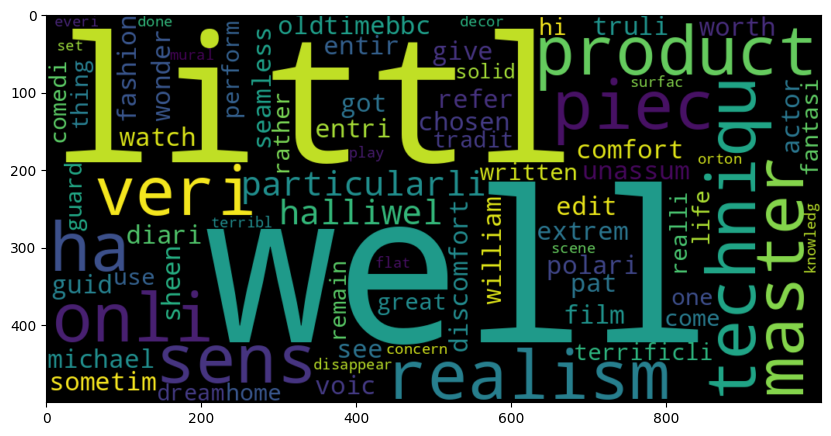

In [ ]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

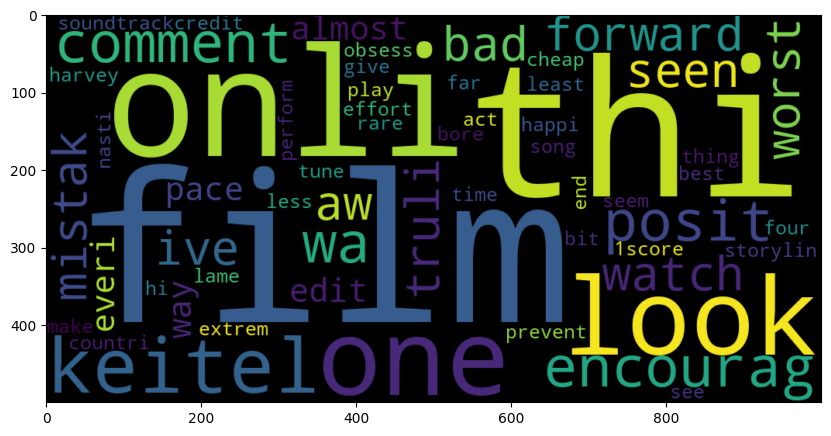

In [ ]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show